<a href="https://colab.research.google.com/github/jikku007/Machine-Learning-Masters/blob/master/LogisticRegression_JJT_Jan2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv(r'/content/diabetes1.csv')

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


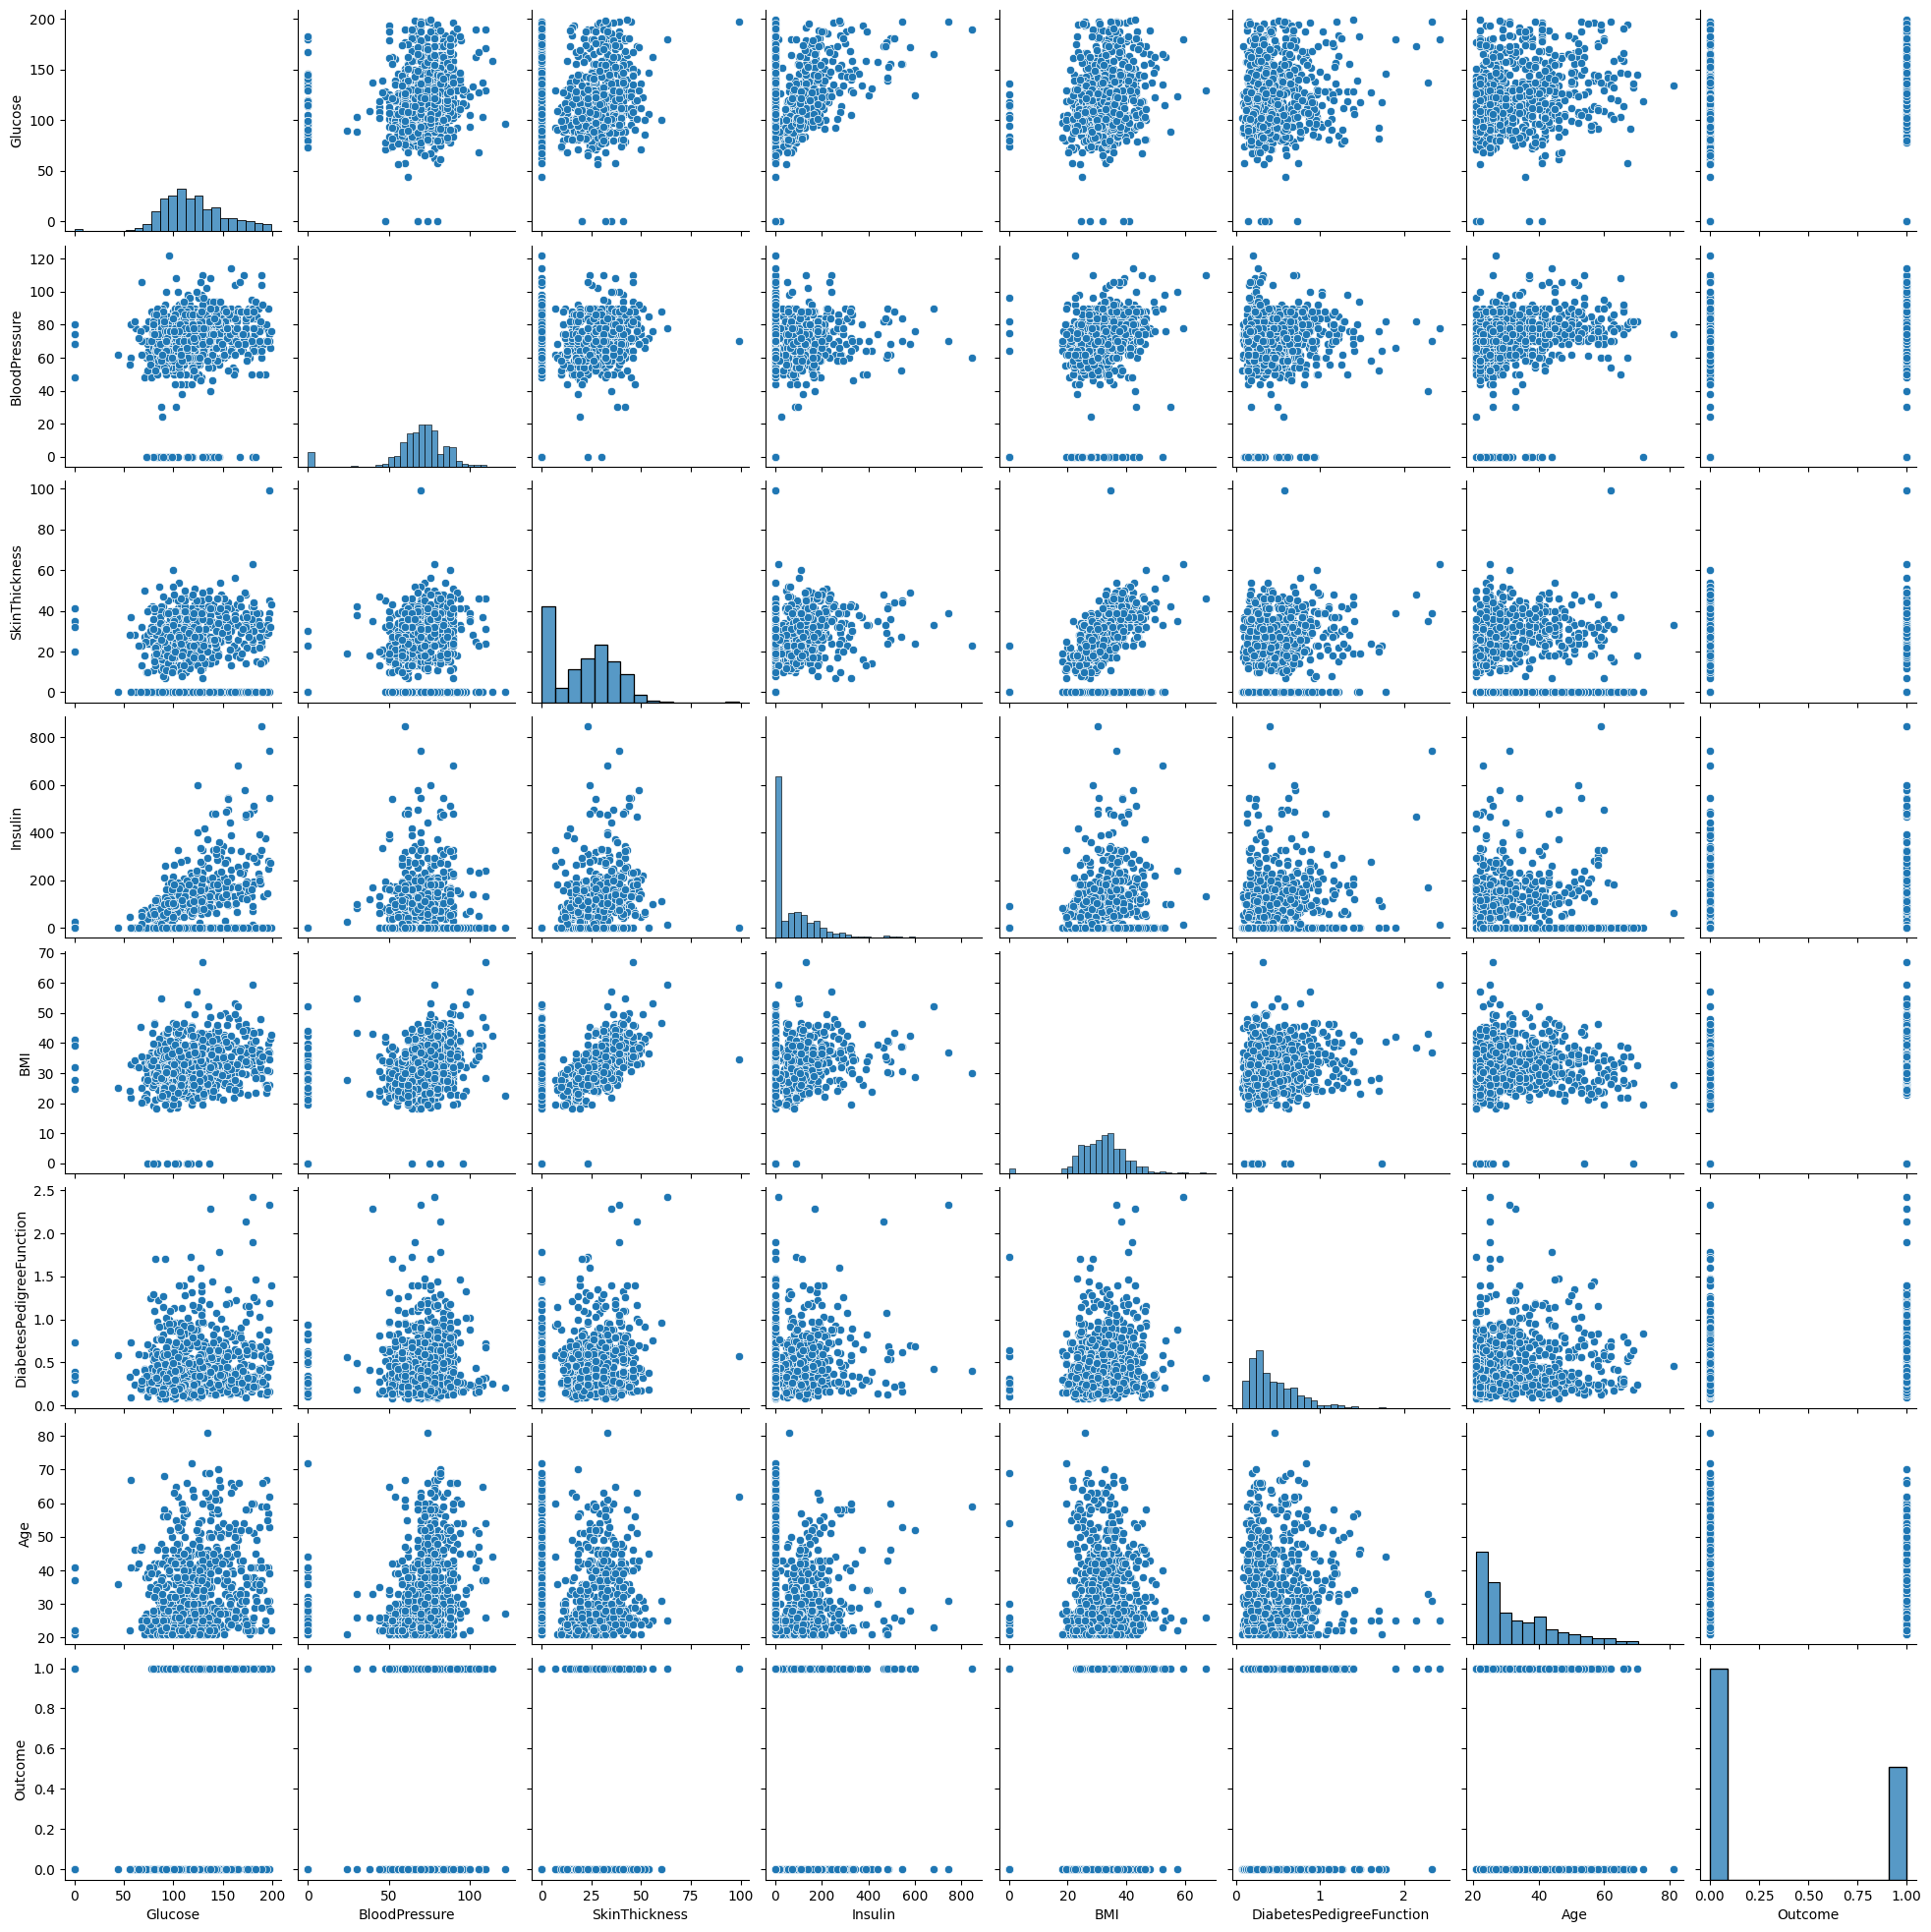

In [6]:
sns.pairplot(data)

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
data.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

<Axes: xlabel='Pregnancies'>

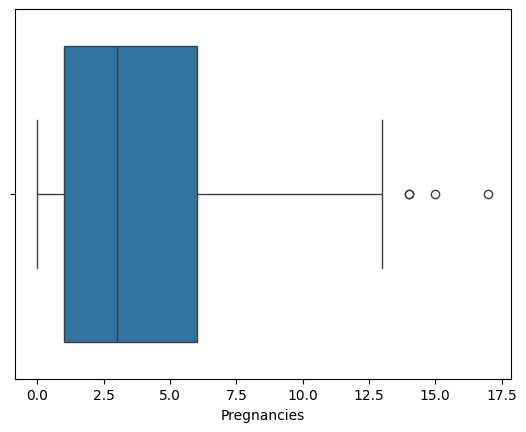

In [16]:
sns.boxplot(x='Pregnancies',data=data)

<Axes: xlabel='Pregnancies', ylabel='count'>

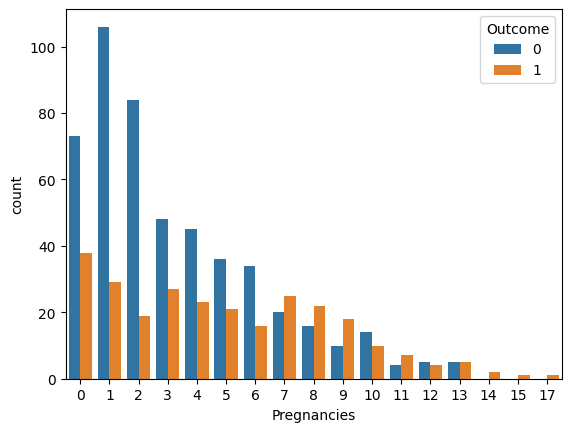

In [19]:
sns.countplot(x='Pregnancies',data=data,hue=data.Outcome)

<Axes: xlabel='Pregnancies', ylabel='Count'>

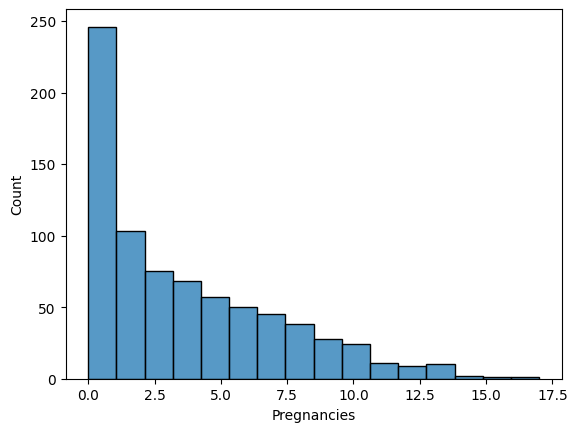

In [20]:
sns.histplot(data.Pregnancies)

<Axes: xlabel='Glucose', ylabel='Count'>

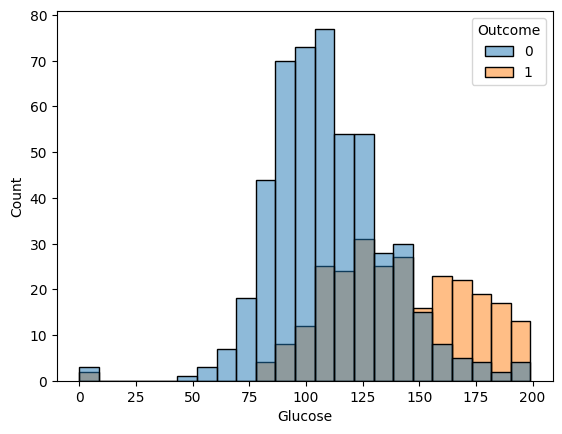

In [24]:
sns.histplot(x=data.Glucose,hue=data.Outcome)

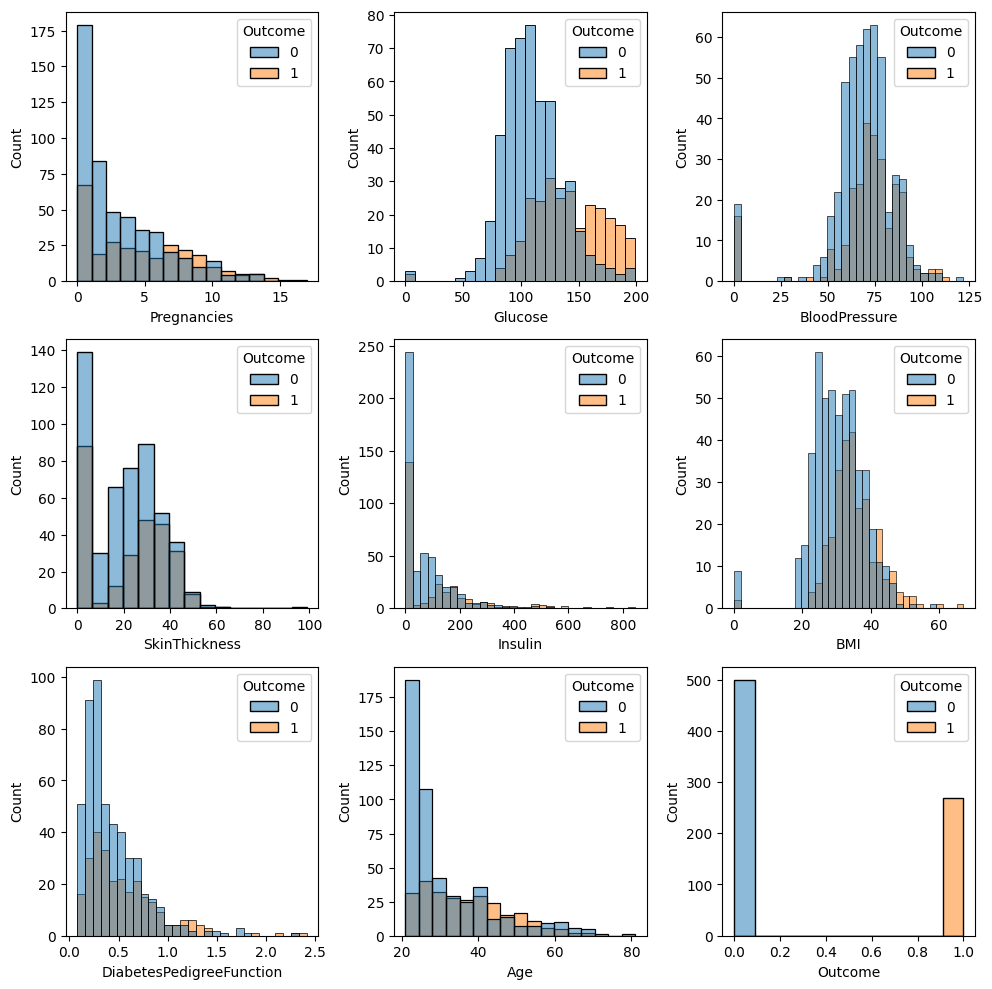

In [29]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in data:
  plt.subplot(3,3,plotnumber)
  sns.histplot(x=data[i],hue=data.Outcome)
  plotnumber+= 1
plt.tight_layout()

In [30]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.3 MB/s eta 0:00:00


In [31]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Pre processing

In [32]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [34]:
data.loc[data['Glucose']==0,'Glucose']=np.median(data.Glucose)

In [35]:
data.loc[data['Glucose']==0,'Glucose']

,Glucose


In [36]:
data.loc[data['BloodPressure']==0,'BloodPressure']=np.median(data.BloodPressure)

In [37]:
data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [38]:
data.loc[data['Age']==0,'Age']

,Age


In [39]:
data.loc[data['SkinThickness']==0,'SkinThickness']=np.median(data.SkinThickness)
data.loc[data['Insulin']==0,'Insulin']=np.median(data.Insulin)
data.loc[data['BMI']==0,'BMI']=np.median(data.BMI)

<ipython-input-39-a321c953b322>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Insulin']==0,'Insulin']=np.median(data.Insulin)


In [40]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [41]:
data.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,  70,  96,  92,  80,  60,  84,  30,
        88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,  85,
        86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,  46,
       102, 100,  61,  24,  38, 106, 114])

In [44]:
data.loc[data.BloodPressure<40,'BloodPressure']=40

<Axes: >

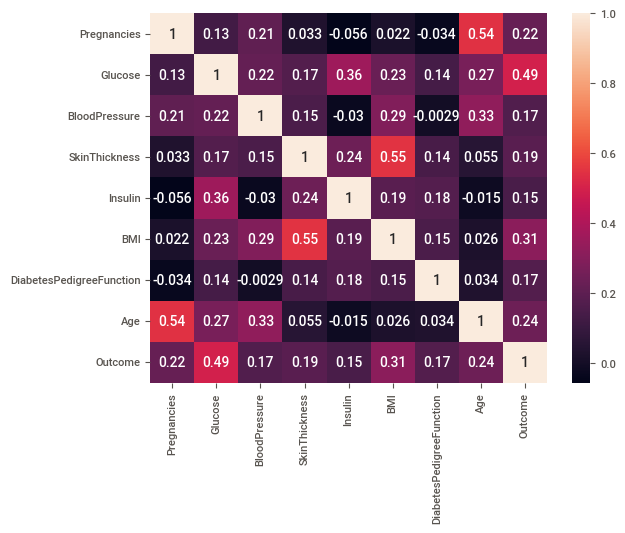

In [48]:
sns.heatmap(data.corr(),annot=True)

Data Modelling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
X_scaled=scal.fit_transform(X)

In [52]:
X=pd.DataFrame(data=X_scaled,columns=data.columns[:8])

In [53]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.390244,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.317073,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.292683,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.317073,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.000000,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.439024,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.365854,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.390244,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.243902,0.173913,0.019832,0.243354,0.115713,0.433333


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred=LR.predict(X_test)

In [58]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred,'Error':Y_test-y_pred})

In [60]:
df

,Actual,Predicted,Error
668,0,0,0
324,0,0,0
624,0,0,0
690,0,0,0
473,0,0,0
...,...,...,...
554,0,0,0
319,1,1,0
594,0,0,0
6,1,0,1


In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [65]:
acc = accuracy_score(Y_test,y_pred)
print('Accuracy:',acc)
pr = precision_score(Y_test,y_pred)
re = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
print('Accuracy:',acc)
pr = precision_score(Y_test,y_pred)
re = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
cm = confusion_matrix(Y_test,y_pred)
print('Precision:',pr,'\nRecall:', re,'\nF1Score', f1, '\nConfusion Matrix\n', cm)
print('Classification Report:\n',classification_report(Y_test,y_pred))

Accuracy: 0.7447916666666666
Accuracy: 0.7447916666666666
Precision: 0.65625 
Recall: 0.6086956521739131 
F1Score 0.631578947368421 
Confusion Matrix
 [[101  22]
 [ 27  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       123
           1       0.66      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192

